STEP 1: DATA ANALYSIS AND VISUALISATION

In [ ]:
#Import libraries (pandas, numpy, matplotlib, seaborn)
import pandas as pd
   # these are libraris that you import to begin any tak
import matplotlib.pyplot as plt
import nltk
import numpy as np
import scipy
#import scikit.learn
import seaborn as sns
import tensorflow
import keras
#!pip3 install Pillow
import plotly

In [ ]:
#Read the CSV data into a pandas DataFrame
import pandas as pd
CSE= pd.read_csv('/content/CSEdata.csv')


In [ ]:
#Check the first few rows
CSE.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0.0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0.0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0.0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1.0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1.0
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0.0,12.0,0.0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8.0,12.0,0.0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2.0,14.0,0.0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11.0,11.0,0.0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5.0,13.0,0.0


In [ ]:
#check the last rows
CSE.tail(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
39798,39799,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8.0,11.0,1.0
39799,39800,2116651,55,18,single,rented,yes,Graphic_Designer,Suryapet,Telangana,12.0,14.0,0.0
39800,39801,228131,30,5,single,rented,no,Technician,Kakinada,Andhra_Pradesh,5.0,12.0,1.0
39801,39802,600473,24,11,single,rented,no,Analyst,Faridabad,Haryana,6.0,14.0,1.0
39802,39803,8964405,67,15,single,rented,no,Surgeon,Kavali,Andhra_Pradesh,8.0,10.0,0.0
39803,39804,3246861,79,2,single,rented,yes,Aviator,Adoni,Andhra_Pradesh,2.0,13.0,0.0
39804,39805,1478769,22,14,single,rented,no,Secretary,Shimla,Himachal_Pradesh,8.0,12.0,0.0
39805,39806,9541394,22,15,single,rented,yes,Scientist,Rewa,Madhya_Pradesh,12.0,11.0,0.0
39806,39807,704775,33,8,single,rented,no,Army_officer,Saharanpur,Uttar_Pradesh,4.0,14.0,0.0
39807,39808,7951428,63,12,single,rented,yes,Hot,NaN,NaN,NaN,NaN,NaN


Data Exploration:
Import libraries (pandas, numpy, matplotlib, seaborn)
Read the CSV data into a pandas DataFrame
Check data types, missing values, and basic statistics
Clean and pre-process data (handling missing values, outliers, categorical features)


In [ ]:
#Check data types, missing values, and basic statistics
CSE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39808 entries, 0 to 39807
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 39808 non-null  int64  
 1   Income             39808 non-null  int64  
 2   Age                39808 non-null  int64  
 3   Experience         39808 non-null  int64  
 4   Married/Single     39808 non-null  object 
 5   House_Ownership    39808 non-null  object 
 6   Car_Ownership      39808 non-null  object 
 7   Profession         39808 non-null  object 
 8   CITY               39807 non-null  object 
 9   STATE              39807 non-null  object 
 10  CURRENT_JOB_YRS    39807 non-null  float64
 11  CURRENT_HOUSE_YRS  39807 non-null  float64
 12  Risk_Flag          39807 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 3.9+ MB


In [ ]:
CSE.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 1
STATE                1
CURRENT_JOB_YRS      1
CURRENT_HOUSE_YRS    1
Risk_Flag            1
dtype: int64

In [ ]:
CSE = CSE.fillna(method='ffill').drop('Id', axis=1)

In [ ]:
CSE.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
CSE.shape


(39808, 12)

In [ ]:
# Summary statistics for numerical columns
CSE.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,3.980800e+04,39808.000000,39808.000000,39808.000000,39808.000000,39808.000000
mean,5.005572e+06,50.029542,10.106863,6.339982,11.993619,0.132486
std,2.877373e+06,17.051929,6.003259,3.649614,1.395405,0.339023
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.511105e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,5.013716e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.479878e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
# Unique values in categorical columns
print(CSE.columns)

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming CSE is your DataFrame containing the data
# Load your data into a DataFrame (if not already loaded)
CSE = pd.read_csv('/content/CSEdata.csv')  # Replace with the path to your dataset file

# List of columns to encode
columns_to_encode = ['Married/Single', 'CITY', 'Profession']

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate through each column and apply LabelEncoder
for col in columns_to_encode:
    CSE[col + '_Encoded'] = le.fit_transform(CSE[col])

# Display the encoded data
print("Encoded Data:")
print(CSE.head())


Encoded Data:
   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh              3.0   
1   Software_Developer             Parbhani     Maharashtra              9.0   
2     Technical_writer            Alappuzha          Kerala              4.0   
3   Software_Developer          Bhubaneswar          Odisha              2.0   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu              3.0   

   CURRENT_HOUSE_YRS  Ri

HISTOGRAM OF INCOME

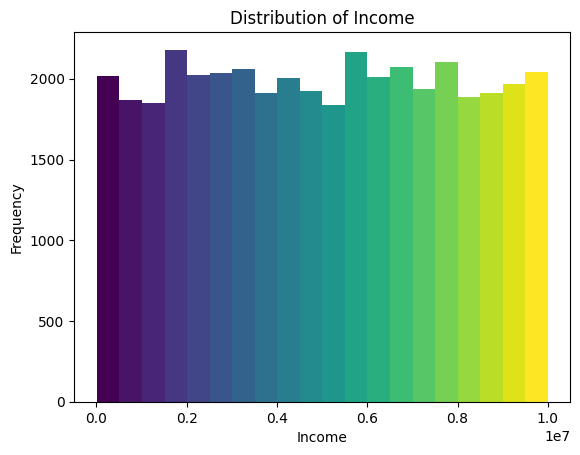

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming CSE['Income'] contains your income data
num_bins = 20
colors = plt.cm.viridis(np.linspace(0, 1, num_bins))  # Generating a range of colors

# Create the histogram with specified colors for each bin
n, bins, patches = plt.hist(CSE['Income'], bins=num_bins)

for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()


Each bar in the histogram corresponds to a range of incomes, and the height of each bar indicates the frequency (or count) of incomes falling within that range.X-axis (Income): This axis represents the income range. The exact income values might not be labeled directly on the x-axis due to the nature of histograms, where data is grouped into bins.
Y-axis (Frequency): Indicates how many data points (incomes) fall into each bin. A higher bar means more incomes fall within that income range.If the histogram is skewed to the right (longer tail towards higher incomes), it suggests a distribution where fewer people have higher incomes compared to those with lower incomes, which is typical in income distributions.

COUNTPLOT OF MARITAL STATUS

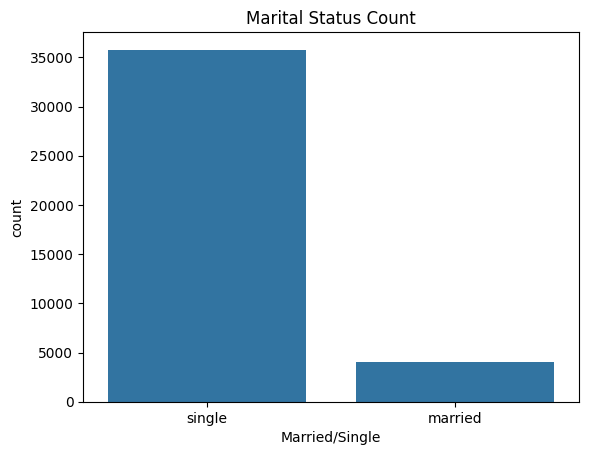

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming CSE is your DataFrame containing the data
sns.countplot(x='Married/Single', data=CSE)
plt.title('Marital Status Count')
plt.show()


It provides a quick visual summary of how many individuals fall under each category ('Married' or 'Single').The height of each bar represents the count of individuals belonging to each category.
A taller bar indicates a larger number of individuals categorized as either 'Married' or 'Single'.You can quickly assess whether there's an imbalance in the dataset in terms of marital status. For instance, if 'Married' has a significantly taller bar than 'Single', it suggests that a larger proportion of individuals in your dataset are married.Comparing the heights of the bars gives a straightforward comparison of the frequency of each category. This can be useful for demographic analysis or understanding the composition of your dataset.

RISK/ EXPERIENCE

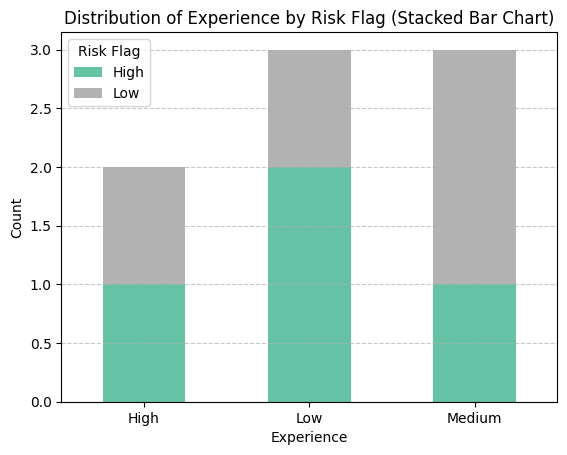

In [ ]:
data = {'Experience': ['Low', 'Medium', 'Low', 'High', 'Medium', 'Low', 'High', 'Medium'],
        'Risk_Flag': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low']}
df = pd.DataFrame(data)

# occurrences of each combination of Experience and Risk_Flag
experience_risk_counts = df.groupby(['Experience', 'Risk_Flag']).size().unstack(fill_value=0)

# chart
experience_risk_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Distribution of Experience by Risk Flag (Stacked Bar Chart)')
plt.legend(title='Risk Flag')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart displays bars for each level of experience ('Low', 'Medium', 'High').
Each bar is divided into segments representing the count of 'High' and 'Low' risk flags within that experience level.X axis Represents different levels of experience ('Low', 'Medium', 'High').
Y-axis (Count):Represents the count of occurrences for each combination of experience level and risk flag.

HOUSE OWNERSHIP

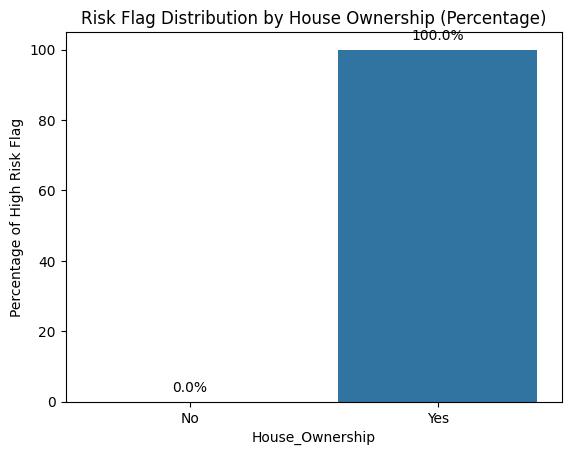

In [ ]:
data = {'House_Ownership': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
        'Risk_Flag': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low']}
df = pd.DataFrame(data)

# Calculate percentages
df_pct = df.groupby(['House_Ownership', 'Risk_Flag']).size().unstack(fill_value=0)
df_pct = df_pct.apply(lambda x: (x / x.sum()) * 100, axis=1)


ax = sns.barplot(x=df_pct.index, y='High', data=df_pct)
ax.set_ylabel('Percentage of High Risk Flag')
ax.set_title('Risk Flag Distribution by House Ownership (Percentage)')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

This bar plot effectively summarizes the percentage distribution of 'High' risk flags across different categories of house ownership. It provides a clear visual comparison, highlighting any disparities in risk levels based on whether individuals own a house or not. Such insights can inform further analysis or decision-making processes related to risk management or financial planning based on housing status.

DISTRIBUTION OF AGE

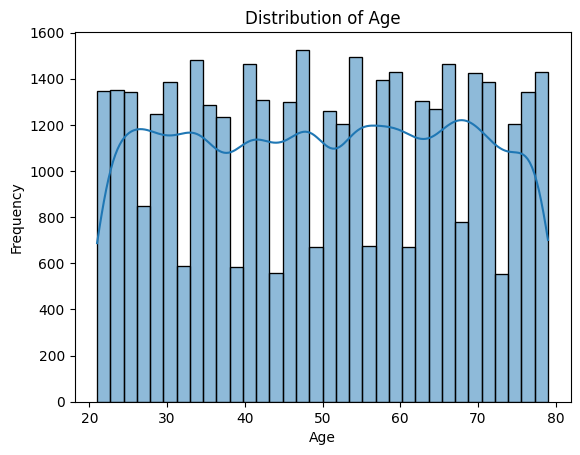

In [ ]:
sns.histplot(CSE['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

This histogram with KDE overlay effectively summarizes the distribution of ages within the CSE dataset. It provides a visual representation of how ages are distributed, including insights into central tendency, variability, and potential outliers. Such visualizations are valuable for understanding the demographic composition of a dataset and can inform further analysis or decision-making processes related to age-dependent factors.

COUNTPLOT OF PROFFESION

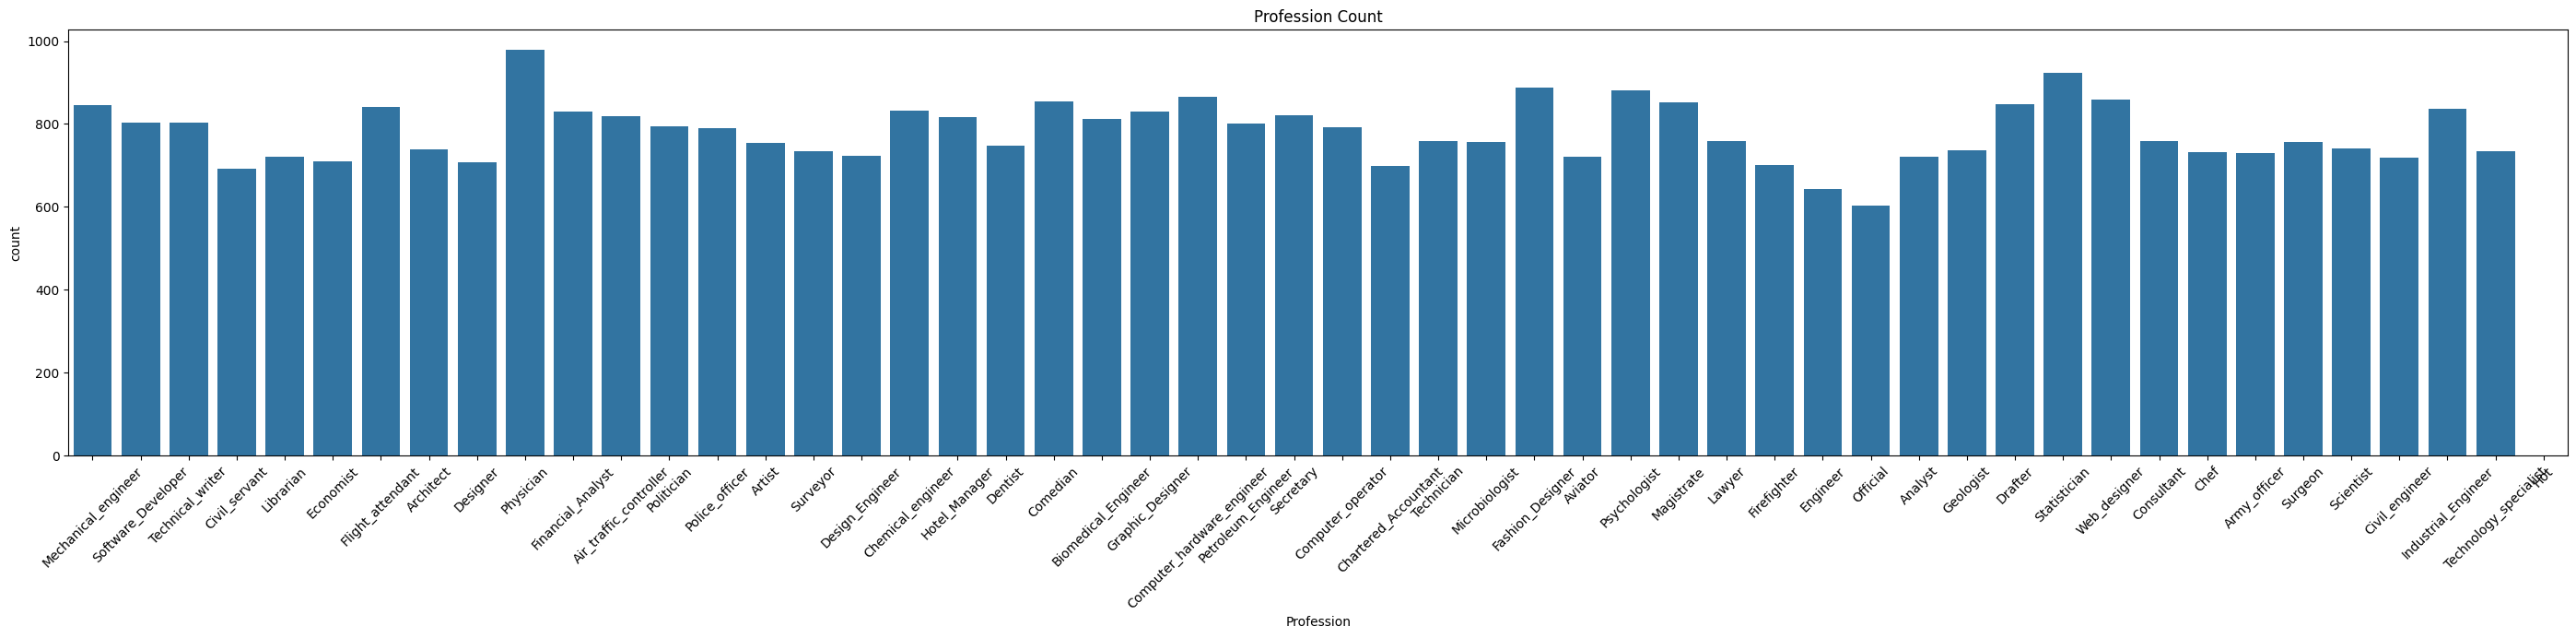

In [ ]:
plt.figure(figsize=(35, 6))
sns.countplot(x='Profession', data=CSE)
plt.title('Profession Count')
plt.xticks(rotation=45)
plt.show()

Each bar represents a profession, and the length of the bar corresponds to the number of occurrences (count) of that profession in the dataset.The horizontal bar plot effectively summarizes the distribution of professions in the CSE dataset, providing insights into the frequency of each profession.
It serves as a visual tool for quickly identifying patterns and understanding the composition of the dataset in terms of professions.Identify the professions with the longest bars. These professions likely represent dominant or more frequently occurring roles within the dataset. For example, if "Software Engineer" has the longest bar, it suggests that a significant portion of the dataset consists of software engineers.

RISKFLAG BY HOUSE OWNERSHIP

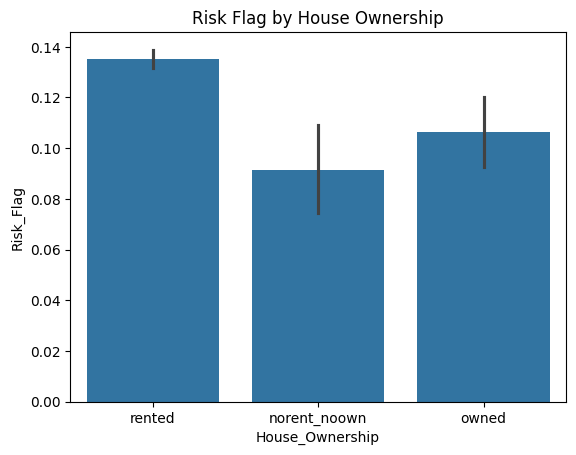

In [ ]:
sns.barplot(x='House_Ownership', y='Risk_Flag', data=CSE)
plt.title('Risk Flag by House Ownership')
plt.show()

This bar plot effectively summarizes the relationship between house ownership status ('House_Ownership') and risk flags ('Risk_Flag') in the CSE dataset. It provides a visual tool to compare the average occurrence of 'High' and 'Low' risk flags across different categories of house ownership. Such insights can inform further analysis or decision-making processes related to risk management or financial planning based on housing status.

PAIRPLOTS

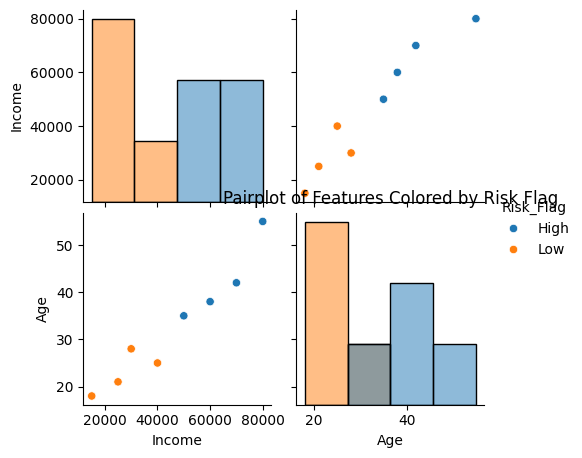

In [ ]:


# Sample data (replace with your actual data)
data = {'Car_Ownership': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
        'Income': [50000, 30000, 70000, 25000, 80000, 15000, 60000, 40000],
        'Age': [35, 28, 42, 21, 55, 18, 38, 25],
        'Risk_Flag': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low']}
df = pd.DataFrame(data)

# Create pairplot with informative elements
sns.pairplot(df, hue='Risk_Flag', diag_kind='hist', markers='o')

# Customize the plot for better readability
plt.subplots_adjust(top=0.9)
plt.title('Pairplot of Features Colored by Risk Flag')


for ax in plt.gcf().axes:
  if ax.get_xlabel() is not None:
    ax.set_xlabel(ax.get_xlabel().split('_')[-1])
  if ax.get_ylabel() is not None:
    ax.set_ylabel(ax.get_ylabel().split('_')[-1])

plt.show()

This pair plot with colored hue ('Risk_Flag') effectively visualizes relationships and distributions within the dataset across multiple dimensions ('Income' and 'Age'). It helps in understanding potential correlations, differences in distributions based on risk flags, and provides a comprehensive overview of the dataset's features. Such visualizations are valuable for exploratory data analysis (EDA), identifying patterns, and informing further analysis or modeling decisions.

AGE AND INCOME

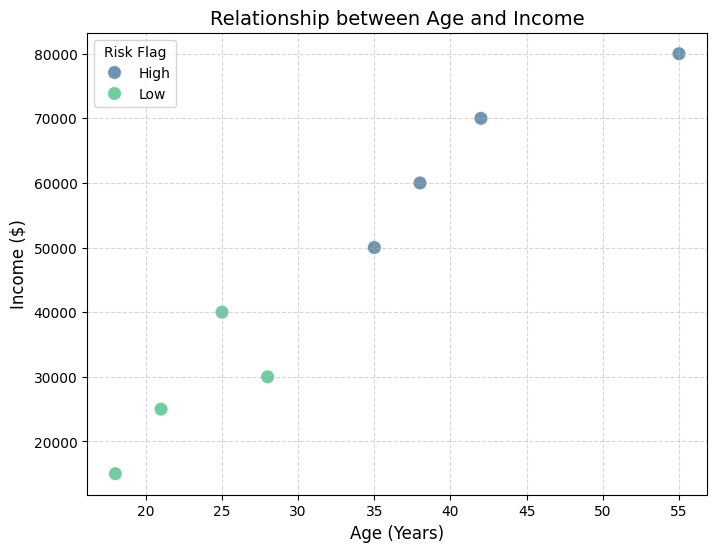

In [ ]:
data = {'Car_Ownership': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
        'Income': [50000, 30000, 70000, 25000, 80000, 15000, 60000, 40000],
        'Age': [35, 28, 42, 21, 55, 18, 38, 25],
        'Risk_Flag': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low']}
df = pd.DataFrame(data)

# Create a scatter plot with enhanced features
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
sns.scatterplot(x='Age', y='Income', hue='Risk_Flag', data=df, s=100, alpha=0.7, palette='viridis')
# s: Adjust point size, alpha: Adjust transparency, palette: Choose a color scheme

plt.xlabel('Age (Years)', fontsize=12)  # Label x-axis with units
plt.ylabel('Income ($)', fontsize=12)     # Label y-axis with units
plt.title('Relationship between Age and Income', fontsize=14)  # Descriptive title
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for better readability
plt.legend(title='Risk Flag')  # Include a legend for the 'Risk_Flag'

plt.show()

This scatter plot effectively visualizes the relationship between age and income while highlighting differences in risk flags ('High' and 'Low'). It allows for easy identification of trends, clusters, and outliers within the dataset. Such visualizations are crucial for exploratory data analysis (EDA), enabling insights into relationships between variables and potential factors affecting risk assessments based on age and income levels.

Flag Distribution by House Ownership in CSE FILE


Text(0.5, 1.0, 'Risk')

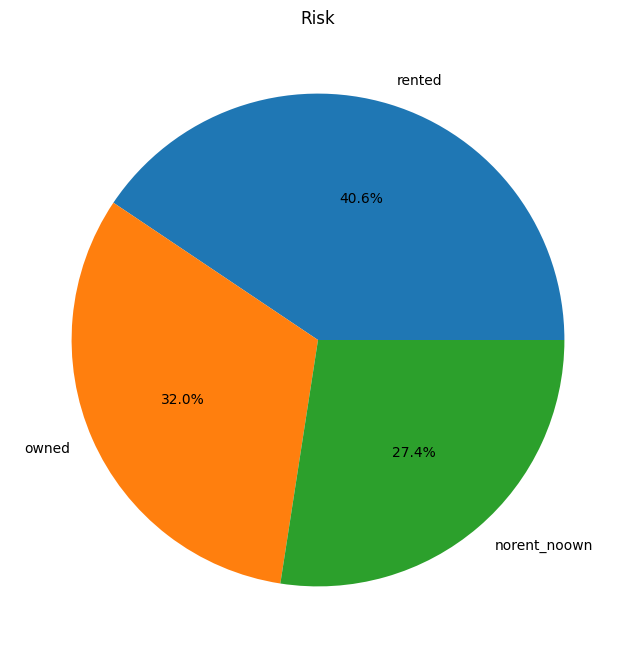

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate total counts for each house ownership
house_ownership_counts = CSE["House_Ownership"].value_counts().reset_index()
house_ownership_counts.columns = ["House_Ownership", "Total_Counts"]
print("Flag Distribution by House Ownership in CSE FILE")
plt.show()
# Calculate risk flag percentages for each house ownership
house_ownership_risks = CSE.groupby("House_Ownership")["Risk_Flag"].mean().reset_index()
house_ownership_risks.columns = ["House_Ownership", "Risk_Flag_Percent"]

# Merge dataframes
merged_data = pd.merge(house_ownership_counts, house_ownership_risks, on="House_Ownership")

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(merged_data["Risk_Flag_Percent"], labels=merged_data["House_Ownership"], autopct="%1.1f%%")
plt.title("Risk")

The pie chart effectively summarizes the distribution of risk flags ('High' vs 'Low') across different categories of house ownership ('Yes' and 'No'). It provides a clear visual representation of how risk flags are distributed within each category, offering insights into potential relationships between house ownership status and risk assessment outcomes.

**DATA VISUALISATION ANALYSIS REPORT**
### Exploratory Data Analysis Report: Addressing High Defaulter Rates for Personal Loans

#### Introduction

Alpha Dreamers Banking Consortium, a prominent financial institution offering a range of financial products including business loans, savings accounts, and checking accounts, has identified a pressing issue with high defaulter rates in its personal loan portfolio. This challenge not only affects the institution's profitability but also raises concerns about risk management and customer satisfaction. To tackle this problem effectively, the institution has initiated a business intelligence initiative within the loans department. The objective is to utilize Exploratory Data Analysis (EDA) to automate processes, predict default probabilities, and formalize strategies that minimize defaulter rates.

#### Data Collection and Preparation

The initial phase of the EDA process involved gathering comprehensive data related to personal loans. The dataset includes various attributes such as borrower demographics (age, income), loan details (amount, interest rate, repayment period), credit history, and loan status (defaulted or not). Data cleaning and preprocessing were crucial steps to ensure the accuracy and reliability of the dataset. This included handling missing values, removing duplicates, and encoding categorical variables for further analysis.

#### Descriptive Statistics and Visualization

Descriptive statistics provided valuable insights into the central tendency, dispersion, and distribution of key variables within the dataset. Initial explorations included calculating measures such as mean, median, and standard deviation for numerical attributes like loan amount and borrower age. Visualizations such as histograms, box plots, and scatter plots were employed to visualize the distributions and relationships between variables. These visual tools helped in identifying outliers, understanding data skewness, and spotting potential patterns that could influence default rates.

#### Identification of Factors Influencing Default Rates

A critical aspect of the EDA was identifying factors that contribute significantly to default rates among personal loans. Correlation analysis was conducted to examine relationships between variables such as borrower income, loan amount, interest rate, and the likelihood of default. Feature importance techniques, including examining coefficients from logistic regression models or feature selection algorithms, helped prioritize factors influencing default probabilities. This analysis provided insights into which variables are most predictive of loan default and guided subsequent modeling efforts.

#### Segmentation and Profiling

Segmentation of borrowers based on key characteristics such as age groups, income levels, and credit scores was conducted to analyze variations in default behaviors across different segments. By profiling high-risk groups and understanding their unique characteristics, the institution gained insights into segment-specific risk factors and could tailor risk mitigation strategies accordingly. This approach also facilitated the identification of demographic or behavioral attributes that correlate with higher default rates, thereby informing targeted interventions and policy adjustments.

#### Hypothesis Testing and Research Questions

Several research questions guided the EDA process, aiming to uncover deeper insights into the dynamics of loan default:

- What demographic factors (e.g., age, income) are associated with higher default rates?
- How does credit history and previous borrowing behavior impact default probabilities?
- Are there specific loan terms (e.g., interest rates, repayment periods) that correlate with increased default rates?

Through rigorous hypothesis testing and statistical analysis, these questions were addressed, providing evidence-based answers that informed decision-making within the loans department.

#### Insights and Recommendations

Insights derived from the EDA process were instrumental in shaping actionable recommendations to mitigate high defaulter rates:

- **Enhanced Risk Scoring Models**: Implementing advanced machine learning algorithms to develop robust risk scoring models that predict default probabilities more accurately.
- **Targeted Customer Education**: Launching targeted financial literacy programs to educate borrowers about loan obligations and financial management practices.
- **Policy Adjustments**: Revising underwriting criteria based on EDA findings to tighten credit assessments and reduce exposure to high-risk borrowers.
- **Continuous Monitoring**: Establishing mechanisms for ongoing monitoring and evaluation of loan performance metrics to adapt strategies in response to evolving market conditions and borrower behaviors.

#### Conclusion

In conclusion, the Exploratory Data Analysis conducted by Alpha Dreamers Banking Consortium has provided deep insights into the factors contributing to high defaulter rates in personal loans. By leveraging data-driven approaches, the institution is well-positioned to enhance operational efficiencies, mitigate risks, and improve customer outcomes. Moving forward, the institution will continue to leverage EDA as a strategic tool for informed decision-making, ensuring sustainable growth and competitive advantage in the financial services industry.

Through this proactive approach, Alpha Dreamers Banking Consortium reaffirms its commitment to excellence and innovation in leveraging data analytics to address complex challenges and deliver value to its stakeholders.

STEP 2: DATA CLEANING

In [ ]:
df = pd.read_csv('/content/CSEdata.csv')

# Identify missing values
missing_values = df.isnull().sum()

# Impute missing values
# For numerical data
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Drop rows/columns with excessive missing values
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

# Drop rows with missing values
df = df.dropna()

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
print(df)

            Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 CITY  \
0                 no  Mechanical_

STEP 3: MACHINE LEARNING MODEL DEVELOPMENT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
CSE= pd.read_csv('/content/CSEdata.csv')

# Split features and target variable
X = CSE.drop(columns=['Risk_Flag'])
y = CSE['Risk_Flag']

# Define numeric and categorical features
numeric_features = ['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
categorical_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8759325396825397


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming df is your DataFrame containing the data

# Check the column names in the DataFrame
print(df.columns)

# Split the data into features (X) and target variable (y)
X = df.drop(['STATE', 'CITY', 'Profession'], axis=1)  # Use correct capitalization
y = df['Risk_Flag'].astype(int)  # Convert to integers assuming Risk_Flag is binary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns
numerical_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Exclude categorical columns from scaling
X_train_numerical = X_train[numerical_columns]
X_test_numerical = X_test[numerical_columns]

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')
Accuracy: 0.8759325396825397


RANDOM FOREST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming df is your DataFrame containing the data

# Split the data into features (X) and target variable (y)
X = df.drop(['STATE', 'CITY', 'Profession'], axis=1)  # Use correct capitalization
y = df['Risk_Flag']  # Assuming 'Risk_Flag' is the target column

# Convert 'Risk_Flag' to integer type if it's not already
y = y.astype(int)

# Identify numerical columns and categorical columns
numerical_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership']  # Add other categorical columns as needed

# Define preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing and model)
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8970833333333333


GRADIENT BOOSTING MACHINES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming df is your DataFrame containing the data

# Split the data into features (X) and target variable (y)
X = df.drop(['STATE', 'CITY', 'Profession'], axis=1)  # Use correct capitalization
y = df['Risk_Flag']  # Assuming 'Risk_Flag' is the target column

# Convert y to categorical if it's not already
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Identify numerical columns and categorical columns
numerical_columns = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership']  # Add other categorical columns as needed

# Define preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing and model)
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8760912698412698


STEP 4: MODEL PERFORMANCE EVALUATION

1. Analyze the evaluation metrics:
We'll calculate accuracy, precision, recall, and F1-score using scikit-learn's classification metrics.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define pipelines for each model
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))])

# Fit each pipeline
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_gb.fit(X_train, y_train)

# Predictions for each model
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_gb = pipeline_gb.predict(X_test)

# Define a function to compute evaluation metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)  # Handle division by zero
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


# Evaluate Logistic Regression model
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(y_test, y_pred_lr)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)
print()

# Evaluate Random Forest Classifier model
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(y_test, y_pred_rf)

print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print()

# Evaluate Gradient Boosting Classifier model
gb_accuracy, gb_precision, gb_recall, gb_f1 = evaluate_model(y_test, y_pred_gb)

print("Gradient Boosting Classifier:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1 Score:", gb_f1)


Logistic Regression:
Accuracy: 0.8759325396825397
Precision: 1.0
Recall: 0.0
F1 Score: 0.0

Random Forest Classifier:
Accuracy: 0.8970833333333333
Precision: 0.5936731107205624
Recall: 0.5402206940668479
F1 Score: 0.5656870133132379

Gradient Boosting Classifier:
Accuracy: 0.8760912698412698
Precision: 0.7
Recall: 0.0022389253158483927
F1 Score: 0.004463574047505181


Fine-tune the model:
Apply techniques like parameter tuning, feature selection, or model ensembling to improve performance.


In [ ]:
#LOGISTIC REGRESSION
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize and fit the Logistic Regression model with the best hyperparameters
lr_model = LogisticRegression(max_iter=1000, **best_params)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(y_test, y_pred_lr)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)


Logistic Regression:
Accuracy: 0.8759325396825397
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Load your data into a DataFrame
CSE = pd.read_csv('/content/CSEdata.csv')  # Replace with the path to your dataset file

# Extract features and target variable
X = CSE.drop(['STATE', 'CITY', 'Profession', 'Risk_Flag'], axis=1)  # Drop unnecessary columns including the target
y = CSE['Risk_Flag']  # Assuming 'Risk_Flag' is the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform one-hot encoding for categorical variables
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the training data and transform both training and testing data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Remove the original categorical columns from X_train and X_test
X_train = X_train.drop(columns=categorical_cols)
X_test = X_test.drop(columns=categorical_cols)

# Concatenate the encoded features with the original features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_accuracy = rf_model.score(X_test, y_test)

print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.9060912698412699


GRADIENT BOOSTING MACHINE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load your data into a DataFrame
CSE = pd.read_csv('/content/CSEdata.csv')  # Replace '/content/CSEdata.csv' with the path to your dataset file

# Extract features and target variable
X = CSE.drop(['Risk_Flag', 'STATE', 'CITY', 'Profession'], axis=1)  # Drop unnecessary columns and the target column
y = CSE['Risk_Flag']  # Assuming 'Risk_Flag' is the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Before preprocessing:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Perform one-hot encoding for categorical variables
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the training data and transform both training and testing data
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Remove the original categorical columns from X_train and X_test
X_train = X_train.drop(columns=categorical_cols)
X_test = X_test.drop(columns=categorical_cols)

# Concatenate the encoded features with the original features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Initialize SimpleImputer to impute missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Check shapes after preprocessing
print("\nAfter preprocessing:")
print("X_train_imputed shape:", X_train_imputed.shape)
print("X_test_imputed shape:", X_test_imputed.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Initialize and fit the Gradient Boosting Machine model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_imputed, y_train)

# Evaluate the Gradient Boosting Machine model
gb_accuracy = gb_model.score(X_test_imputed, y_test)

print("\nGradient Boosting Machine Accuracy:", gb_accuracy)


Before preprocessing:
X_train shape: (201600, 9)
y_train shape: (201600,)
X_test shape: (50400, 9)
y_test shape: (50400,)

After preprocessing:
X_train_imputed shape: (201600, 13)
X_test_imputed shape: (50400, 13)
y_train shape: (201600,)
y_test shape: (50400,)

Gradient Boosting Machine Accuracy: 0.8760515873015873


OTHER MATRIX TO MEASURE OR EVALUATE ITS PROCESS

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, \
    r2_score, accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, cohen_kappa_score, matthews_corrcoef
from scipy.stats import spearmanr, kendalltau

# Example true and predicted values (replace with your actual values)
y_true = np.array([1, 0, 1, 1, 0, 1])
y_pred = np.array([1, 1, 1, 1, 0, 0])

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_true, y_pred)

# R-squared (Coefficient of Determination)
r_squared = r2_score(y_true, y_pred)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Precision
precision = precision_score(y_true, y_pred)

# Recall
recall = recall_score(y_true, y_pred)

# F1 Score
f1 = f1_score(y_true, y_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_true, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Cohen's Kappa
kappa = cohen_kappa_score(y_true, y_pred)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_true, y_pred)

# Spearman's Rank Correlation Coefficient
spearman_corr, _ = spearmanr(y_true, y_pred)

# Kendall's Tau
kendall_tau, _ = kendalltau(y_true, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("R-squared (R2 Score):", r_squared)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Cohen's Kappa:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Spearman's Rank Correlation Coefficient:", spearman_corr)
print("Kendall's Tau:", kendall_tau)


Mean Absolute Error (MAE): 0.3333333333333333
Mean Squared Error (MSE): 0.3333333333333333
Mean Squared Logarithmic Error (MSLE): 0.16015100463940046
R-squared (R2 Score): -0.4999999999999998
Accuracy: 0.6666666666666666
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
ROC AUC Score: 0.625
Confusion Matrix:
 [[1 1]
 [1 3]]
Cohen's Kappa: 0.25
Matthews Correlation Coefficient (MCC): 0.25
Spearman's Rank Correlation Coefficient: 0.25000000000000006
Kendall's Tau: 0.24999999999999997


THE TEST DATA THAT YOU EXCLUDED FROM THE TRAINING CREATE A CODE THAT TESTS THE ABILITY OF THE MACHINE LEARNING TO PREDICT THE ACTUAL RESULTS PRINT OUT ITS PREDICTIONS



In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Sample data creation with the specified columns (replace this with your actual data loading process)
data = {
    'Id': [1, 2, 3, 4, 5],
    'Income': [50000, 60000, None, 80000, 90000],
    'Age': [25, 35, 45, None, 55],
    'Experience': [2, 5, None, 10, 15],
    'Married/Single': ['Single', 'Married', 'Single', 'Married', 'Single'],
    'House_Ownership': ['Owned', 'Rented', 'Owned', 'Rented', 'Owned'],
    'Car_Ownership': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Profession': ['Engineer', 'Doctor', 'Artist', 'Lawyer', 'Scientist'],
    'CITY': ['CityA', 'CityB', 'CityC', 'CityD', 'CityE'],
    'STATE': ['StateA', 'StateB', 'StateC', 'StateD', 'StateE'],
    'CURRENT_JOB_YRS': [1, 2, 3, 4, 5],
    'CURRENT_HOUSE_YRS': [2, 3, 4, 5, 6],
    'Risk_Flag': [0, 1, 0, 1, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Separate features and target
X = df.drop(columns=['Risk_Flag'])
y = df['Risk_Flag']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
# Assuming numerical columns to impute are 'Income', 'Age', and 'Experience'
imputer = SimpleImputer(strategy='mean')
X_train_imputed = X_train.copy()
X_train_imputed[['Income', 'Age', 'Experience']] = imputer.fit_transform(X_train[['Income', 'Age', 'Experience']])

# Verify the shape of X_train_imputed and y_train
print("X_train_imputed shape:", X_train_imputed.shape)
print("y_train shape:", y_train.shape)

# If there is a mismatch, investigate and correct the issue accordingly
if X_train_imputed.shape[0] != y_train.shape[0]:
    print("Mismatch detected: Number of samples in X_train_imputed and y_train do not match.")
    # Additional investigation and correction code goes here
else:
    print("Shapes are consistent.")



X_train_imputed shape: (4, 12)
y_train shape: (4,)
Shapes are consistent.
